# https://github.com/alirezadir/Machine-Learning-Interviews/blob/main/src/MLC/ml-coding.md


# ML Coding

根据我最近的面试经验，用torch手撕cnn里各种layer高概率会考。如果和llm相关，手撕attention head肯定要考。手撕gradient一般不会，但还是要准备手撕简单的linear regression和logistic regression的gradient descent。不少面经里看到了这类问题。

## Linear Regression

In [18]:
import numpy as np

class LinearRegression:
    """
    y = XW
    W = (XtX)^(-1)Xty
    """
    def __init__(self):
        self.W = None
    
    def fit(self, X, y):
        """
        X: nxd
        """
        # add bias term
        n = X.shape[0]
        X = np.hstack([np.ones((n, 1)), X])
        self.W = np.linalg.inv(X.T @ X) @ X.T @ y 
    
    def predict(self, X):
        n = X.shape[0]
        X = np.hstack([np.ones((n, 1)), X])
        return X@self.W




# for large datasets, can use gradient descent and also add regularization term
class LinearRegressionGD:
    """ 
    1. Add input validation for the dimensions
    2. Use numpy broadcasting
    3. Add regularization such as L2 norm
    4. Use gradient descent since calculating inverse of matrix can be very computationally expensive. 
    """
    def __init__(self, regul=0):
        self.W = None
        self.regul = regul 
    
    def fit(self, X, y, num_iter = 1000, lr=0.01):
        ''' 
        X: nxd
        y: nx1
        W: dx1
        '''

        # input validation
        if len(X) != len(y) or len(X)==0:
            raise ValueError("X and y must have the same length and cannot be empty")

        # add bias term
        X = np.hstack([np.ones((len(X), 1)), X])

        # init the initial W weights
        self.W = np.zeros(X.shape[1])

        # Use gradient descent to minize the cost
        for i in range(num_iter):
            # calculate predicted values
            y_pred = np.matmul(X, self.W)

            # calculate cost function;
            # include both MSE loss and regularization loss
            # this is mainly used to track the loss reduction pattern
            cost = np.sum((y-y_pred)**2) + self.regul * np.sum(self.W **2)

            # calculate gradident
            gradients = 2 * np.matmul(X.T, (y_pred - y)) + 2 * self.regul * self.W 

            # update W
            self.W = self.W - lr*gradients

            if (i%1000) == 0:
                print(cost)
    
    def predict(self, X):
        X = np.hstack([np.ones((len(X), 1)), X])

        y_pred = np.matmul(X, self.W)

        return y_pred


In [19]:
# Create example input data
X = np.array([[2, 2], [4, 5], [7, 8]])
y = np.array([9, 17, 26])

# Fit linear regression model
lr = LinearRegression()
lr.fit(X, y)
print(lr.W) # [3. 1. 2.]

# Make predictions on new data
X_new = np.array([[10, 11], [13, 14]])
y_pred = lr.predict(X_new)
print(y_pred)  # Output: [43. 55.]

[3. 1. 2.]
[35. 44.]


In [20]:
X = np.array([[1, 2, 3, 4, 5]]).T
y = np.array([2, 4, 5, 4, 5])
lr = LinearRegressionGD(regul=0.1)
lr.fit(X, y, lr=0.01, num_iter=10000)
print(lr.W)  # Output: [ 1.99964292  0.65345474 ]
y_pred = lr.predict(X)
print(y_pred)  # # Output: [2.65309766, 3.3065524, 3.96000714, 4.61346188, 5.26691662]

86.0
2.8791287270130335
2.8791287270130344
2.8791287270130344
2.8791287270130344
2.8791287270130344
2.8791287270130344
2.8791287270130344
2.8791287270130344
2.8791287270130344
[1.99964292 0.65345474]
[2.65309766 3.3065524  3.96000714 4.61346188 5.26691662]


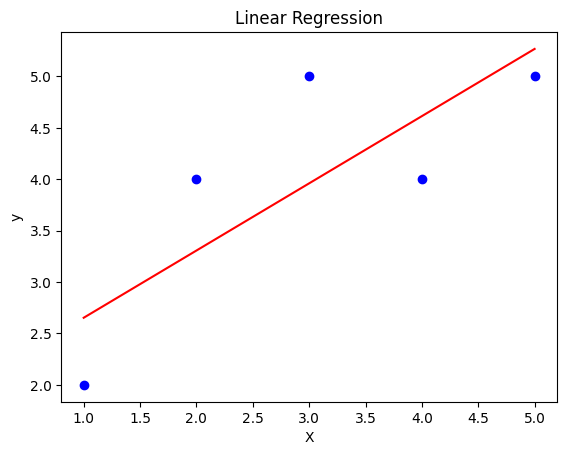

In [21]:
import matplotlib.pyplot as plt 

# Plot the data and the linear regression line
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

## Logistic Regression

In [19]:
import numpy as np

class LogisticRegression:

    def __init__(self, lr=0.01, n_iters=1000, tol=1e-4):
        self.lr = lr
        self.n_iters = n_iters
        self.tol = tol
        self.weights = None
        self.bias = None
    
    def _sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    
    def _loss(self, y, y_pred):
        return -np.mean(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

    def fit(self, X, y):
        # number of samples and features
        n_samples, n_features = X.shape

        # Init weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        prev_loss = float('inf')

        # gradient descent
        for _ in range(self.n_iters):
            z = np.matmul(X, self.weights) + self.bias
            y_pred = self._sigmoid(z)

            # calcualte loss
            loss = self._loss(y, y_pred)
            if abs(prev_loss - loss) < self.tol:
                break
            
            prev_loss = loss

            # compute gradients
            dw = (1/n_samples) * np.matmul(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            # update parameters
            self.weights -= self.lr * dw 
            self.bias -= self.lr * db 

    def predict_proba(self, X):
        z = np.matmul(X, self.weights) + self.bias
        return self._sigmoid(z)

    def predict(self, X, threshold=0.5):
        prob = self.predict_proba(X)
        return (prob >= threshold).astype(int)


In [20]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = LogisticRegression(lr=0.1, n_iters=1000)
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.83


## kNN


In [ ]:
from collections import Counter
import numpy as np

class kNN:
    def __init__(self, k=3, distance='euclidean'):
        self.k = k
        self.distance = distance
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            # compute distances between the test point and all training points
            if self.distance == 'euclidean':
                distances = np.linalg.norm(self.X_train - x, axis = 1)
            
            # select k nearst neighbors
            # 按照距离进行排序，拿到样本的前k个索引，距离最近的k个样本的索引
            nearest_indices = np.argsort(distances)[:self.k]
            # 通过索引从y_train中取出这k个邻居的标签
            nearest_labels = self.y_train[nearest_indices]

            # assign the class label that apprear most frequently among the k nearest neighbors
            # 创建一个字典，统计每个标签出现的次数， 返回出现次数最多的那个标签及其频率，[0][0]取出标签名，作为预测结果。
            label = Counter(nearest_labels).most_common(1)[0][0]
            y_pred.append(label)

        return np.array(y_pred)


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Create a KNN classifier with k=5 and euclidean distance
knn = kNN(k=5, distance='euclidean')

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


# k-Means

In [1]:
""" 
1. Initialization
- k number of clusters
- data: input of datasets
- randomly assign k centroids

2. Repeat
- Assign each data point to the nearest centroid (based on Euclidean distance)
- Calculate the mean of each cluster to update its centroid
- Check if the centroids have converged or max iteration reached(i.e., they no longer change)

3. Until 
- Centroids have converged
- Max number of iterations has been reached

4. Output
- The final K clusters and their corresponding centroids

"""
import numpy as np

class KMeans:
    def __init__(self, k, max_iters = 1000, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, X):
        # Initiate centroids randomly
        n_samples = X.shape[0]
        # randomly select k indices from n indices without replacement
        self.centroids = X[np.random.choice(n_samples, self.k, replace=False)]

        # Iterate until convergence or maximum number of iterastions is reached
        for i in range(self.max_iters):
            # assign each data point to the closest centroid
            # X[:, np.newaxis] (n_samples, 1, n_features); newaxis是给X加一个新的axis，为了可以broadcasting进行相减
            # 相当于 X[:, np.newaxis, :], 新的维度加在中间
            # self.centroids (k, n_features)， 这个被广播成
            distances = np.linalg.norm(X[:, np.newaxis, :] - self.centroids, axis = 2) 
            cluster_assignments = np.argmin(distances, axis=1)

            # Update the centroids based on the new cluster assignments
            # 对于每一个j，从X中选出所有被分到这个cluster j的点，然后求他们的平均值（新的质心位置）
            new_centroids = np.array([np.mean(X[np.where(cluster_assignments == j)], axis = 0) 
                                      for j in range(self.k)])
            
            # check for convergence
            if np.linalg.norm(new_centroids-self.centroids) < self.tol:
                break
            
            self.centroids = new_centroids

    def predict(self, X):
        # Assign each data point to the closest centroid
        distances = np.linalg.norm(X[:, np.newaxis, :] - self.centroids, axis=2)
        cluster_assignments = np.argmin(distances, axis=1)

        return cluster_assignments


In [22]:
x1 = np.random.randn(5,2) + 5
x2 = np.random.randn(5,2) - 5
X = np.concatenate([x1,x2], axis=0)

# Initialize the KMeans object with k=3
kmeans = KMeans(k=2)

# Fit the k-means model to the dataset
kmeans.fit(X)

# Get the cluster assignments for the input dataset
cluster_assignments = kmeans.predict(X)

# Print the cluster assignments
print(cluster_assignments)

# Print the learned centroids
print(kmeans.centroids)

[0 0 0 0 0 1 1 1 1 1]
[[ 5.32249308  5.23600716]
 [-4.52531636 -5.1229617 ]]


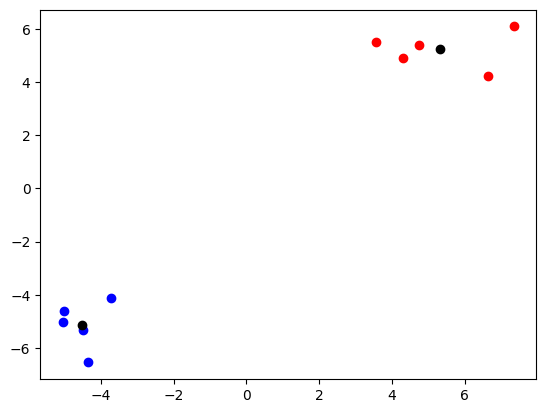

In [23]:
from matplotlib import pyplot as plt
# Plot the data points with different colors based on their cluster assignments
colors = ['r', 'b']
for i in range(kmeans.k):
    plt.scatter(X[np.where(np.array(cluster_assignments) == i)][:,0], 
                X[np.where(np.array(cluster_assignments) == i)][:,1], 
                color=colors[i])

# Plot the centroids as black circles
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], color='black', marker='o')

# Show the plot
plt.show()

# DL

## MLP, FNN, Softmax

In [ ]:
# implement the backpropagation of a neural network for doing binary classfication
def 

## TF-IDF

In [ ]:
import math
from collections import Counter, defaultdict

def compute_tf(doc):
    """ 
    Term frequency
    TF(doc) -> 每个词t在文档doc中出现的频率。freq[t]//total_counts_of_words
    """
    words = doc.split()
    word_count = Counter(words)
    total = len(words)
    return {word: count / total for word, count in word_count.items()}

def compute_idf(docs):
    """ 
    Inverse Document Frequency
    用来很亮一个词是否是稀有词，即在多少个文档中出现过
    IDF(word) = log(N/(1+num_docs(word)))
    N: 总文档的数目
    num_docs(word)：包含word的文档数目；
    加1是为了smoothing，prevent from divided by 0

    所以越常见的词，IDF越低（不重要）；少见的词，IDF越高（更重要）
    
    """
    N = len(docs)
    doc_freq = defaultdict(int)
    for doc in docs:
        unique_words = set(doc.split())
        for word in unique_words:
            doc_freq[word] += 1
    idf = {word: math.log(N/(1+freq)) for word, freq in doc_freq.items()}
    return idf

def compute_tfidf(docs):
    # final tf-idf is
    # TF(word, docs)*IDF(docs)
    idf = compute_idf(docs)
    tfidf_list = []
    for doc in docs:
        tf = compute_tf(doc)
        tfidf = {word: tf[word] * idf[word] for word in tf}
        tfidf_list.append(tfidf)
    return tfidf_list

# 测试
docs = [
    "the cat sat on the mat",
    "the dog sat on the log",
    "cats and dogs are great pets"
]

tfidf_scores = compute_tfidf(docs)

# 打印结果
for i, doc_scores in enumerate(tfidf_scores):
    print(f"\nDocument {i+1} TF-IDF:")
    for word, score in sorted(doc_scores.items(), key=lambda x: -x[1]):
        print(f"  {word}: {score:.4f}")


Document 1 TF-IDF:
  cat: 0.0676
  mat: 0.0676
  the: 0.0000
  sat: 0.0000
  on: 0.0000

Document 2 TF-IDF:
  dog: 0.0676
  log: 0.0676
  the: 0.0000
  sat: 0.0000
  on: 0.0000

Document 3 TF-IDF:
  cats: 0.0676
  and: 0.0676
  dogs: 0.0676
  are: 0.0676
  great: 0.0676
  pets: 0.0676


## Attention

In [5]:
import torch
from torch import nn
import torch.nn.functional as F 
import math

# only for Encoder part; 
# decoder part need the causal masking for the output embedding

class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        # 我的类来自nn Module，需要调用父类的构造函数，保证初始化逻辑被执行
        super().__init__()
        self.embed_dim = embed_dim # d
        self.num_heads = num_heads # h
        self.head_dim = embed_dim//num_heads # d_k = d//h

        self.q_proj = nn.Linear(embed_dim, embed_dim)
        self.k_proj = nn.Linear(embed_dim, embed_dim)
        self.v_proj = nn.Linear(embed_dim, embed_dim)
        self.out_proj = nn.Linear(embed_dim, embed_dim)
    
        self.ln1 = nn.LayerNorm(embed_dim)
        self.ln2 = nn.LayerNorm(embed_dim)

        self.ffn = nn.Sequential(
            nn.Linear(embed_dim, 4*embed_dim),
            nn.ReLU(),
            nn.Linear(4 * embed_dim, embed_dim)
        )

    def forward(self, x, mask = None):
        # x: [batch, seq_len, embed_dim]
        B, T, C = X.shape

        # 1. LayNorm before attention
        # 虽然原始论文中用的是post norm，但是post norm会导致训练困难，容易梯度消失或者爆炸
        # pre norm稳定性更好，支持更深的模型，现在的bert gpt还有t5都默认使用prenorm
        x_norm = self.ln1(x)

        # 2. Linear projetions through three Linear layers
        Q = self.q_proj(x_norm) # [B, T, C]
        K = self.k_proj(x_norm)
        V = self.v_proj(x_norm)

        # 3. split heads
        # view是pytorch的tensor的reshape，这边是将C 拆解成num_heads * head_dim
        Q = Q.view(B, T, self.num_heads, self.head_dim).transpose(1, 2) # [B, num_heads, T, head_dim], 把头的dimension当到前面 方便每个head可以独立做注意力计算，最后再合并
        K = K.view(B, T, self.num_heads, self.head_dim).transpose(1, 2) # [B, num_heads, T, head_dim]
        V = V.view(B, T, self.num_heads, self.head_dim).transpose(1, 2) # [B, num_heads, T, head_dim]

        # 4. scaled dot product attention
        scores = nn.matmul(Q, K.tranpose(2, 3)) / math.sqrt(self.head_dim) # [B, nh, T, T]

        # masking here can be used for both padding mask and causal mask in decoder
        # padding mask: mask the padding token in the scores matrix;
        # causal mask: prevent decoder to see future information during decoding.
        if mask:
            scores = scores.masked_fill(mask==0, float('-inf'))
        
        attn = F.softmax(scores, dim=-1) # [B, nh, T, T]， dim=-1表示在最后一个dimension上面做softmax，就是在seq len维度上对每个token对所有token的注意力分数做归一化概率分布。
        out = nn.matmul(attn, V) # [B, nh, T, hd]


        # 5. merge heads
        # contiguous 是pytorch中让tensor在memory中变成连续存储，方便后面的view操作可以安全执行。因为view只能作用于内存连续的tensor
        # 最后将n_head*head_dim -> embed_dim = C
        out = out.transpose(1, 2).contiguous().view(B, T, C) # [B, T, C]
        out = self.out_proj(out)

        # 6. Residual connection + second LayerNorm + Feedfoward
        x = x + out
        x = x + self.ffn(self.ln2(x))

        return x
    


class TransformerEncoder(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_heads, max_len=512):
        super().__init__()
        self.token_embed = nn.Embedding(vocab_size, embed_dim)
        # 创建了一个科学系的位置编码参数，nn.Parameter可以保证这个tensor在训练时候会被优化
        self.pos_embed = nn.Parameter(torch.zeros(1, max_len, embed_dim))
        self.attn_block = MultiHeadAttention(embed_dim, num_heads)
    
    def forward(self, x):
        B, T = x.shape # [B, T]
        tok = self.token_embed(x) # [B, T, C]
        # 从位置编码参数重取出当前batch使用的前T个位置，就可以和tok相加，利用broadcasting加到所有的batch上面。
        pos = self.pos_embed[:, :T, :] # [1, T, C]
        x = pos + tok
        x = self.attn_block(x)
        return x


# Others

## Decision Trees

## Linear SVM

## Stratified sampling

## k-fold cross validation split

In [2]:
# Design and implement a data splitting function for stratified k-fold cross-validation. 
# Given a list of labels and a number of folds, assign each label to a fold. 
# Each fold should (as much as possible) be equal in length and have a label distribution that matches the original list. 
# The function can be deterministic to start, but the ultimate goal is for it to be random.

labels = ["dog", "dog", "cat", "dog", "dog", "cat"]
num_folds = 2
# X = [x1,x2,...] -> train + val, 
# y = [y1,y2,...]

# GPT做法
from collections import defaultdict
import random

def stratified_kfold_indices(labels, k=2, seed=None):
    if seed is not None:
        random.seed(seed)

    label_to_indices = defaultdict(list)
    for idx, label in enumerate(labels):
        label_to_indices[label].append(idx)

    folds = [[] for _ in range(k)]

    for label, indices in label_to_indices.items():
        random.shuffle(indices)
        for i, idx in enumerate(indices):
            folds[i % k].append(idx)

    return folds

# my solution
from collections import Counter
def kFoldValidation(labels, k=2):
    """
    X.shape = (m, n)
    len(labels)=m
    k =2

    X_train.size = m//2, X_val.size = m-m//2
    labels can be more than 2.

    hash(lables)- label1: (l1), labels2: (l2), label3: l3,...

    X_train -> l1-l1//2
    X_val -> l1//2

    """
    hashmap = Counter(labels) # dog: 4, cat:2
    res = [[] for _ in range(k)]

    for label, freq in hashmap.items():
        used = 0
        while used < freq:
            res[used%k].append(label)
            used += 1


    return res
labels = ["dog", "dog", "cat","dog", "dog", "dog", "cat"]
num_folds = 2
print(kFoldValidation(labels, num_folds))


[['dog', 'dog', 'dog', 'cat'], ['dog', 'dog', 'cat']]


## Reservior Sampling